# Visualize metapath performance against permutation

In [1]:
library(dplyr, warn = FALSE)

In [2]:
auroc_df = readr::read_tsv('data/feature-performance/auroc.tsv') %>%
  dplyr::mutate(fdr_delta_auroc = p.adjust(pval_delta_auroc, method = 'fdr')) %>%
  dplyr::mutate(fdr_significant = fdr_delta_auroc <= 0.01)
head(auroc_df, 2)

,metapath,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,fdr_delta_auroc,fdr_significant
1,CbG<rG<rGaD,0.63605,0.61395,0.57445,0.84662,0.56577,0.070275,2.0386e-05,0.0004638777,TRUE
2,CbG<rG<rGdD,0.58014,0.57085,0.5367,0.38146,0.54954,0.0306,0.00010263,0.001178779,TRUE


In [3]:
# auroc_df %>%
#   ggplot2::ggplot(ggplot2::aes(x = pval_auroc)) +
#   ggplot2::geom_histogram(binwidth = 0.01)

In [4]:
# metapath_df = 'data/metapaths.tsv' %>%
#   readr::read_tsv()  %>%
#   dplyr::transmute(metapath = abbreviation, length)

metaedge_df = readr::read_tsv('data/metaedge-in-metapath.tsv') %>%
  dplyr::inner_join(auroc_df)

head(metaedge_df, 2)

Joining by: "metapath"


,metapath,metaedge,metaedge_abbrev,position,length,dwpc_auroc,pdwpc_auroc,rdwpc_auroc,nonzero,pdwpc_primary_auroc,delta_auroc,pval_delta_auroc,fdr_delta_auroc,fdr_significant
1,CbGaD,Compound - binds - Gene,CbG,1,2,0.71284,0.62807,0.66936,0.32238,0.56754,0.1453,6.114e-07,5.671911e-05,TRUE
2,CbGaD,Disease - associates - Gene,DaG,2,2,0.71284,0.62807,0.66936,0.32238,0.56754,0.1453,6.114e-07,5.671911e-05,TRUE


In [5]:
metaedge_summary_df = metaedge_df %>%
  dplyr::group_by(metaedge) %>%
  dplyr::summarize(
    max_auroc = max(dwpc_auroc),
    max_delta_auroc = max(delta_auroc)
  ) %>%
  dplyr::arrange(max_delta_auroc)

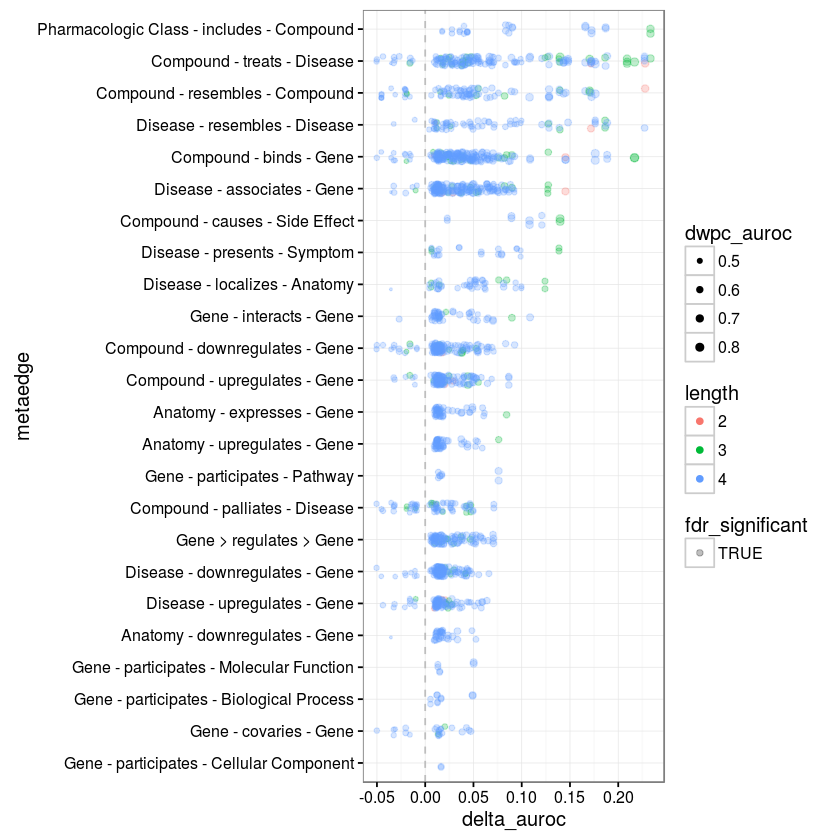

In [6]:
metaedge_df %>%
  dplyr::filter(fdr_significant) %>%
  dplyr::mutate(length = as.character(length)) %>%
  ggplot2::ggplot(mapping = ggplot2::aes(x = delta_auroc, y = metaedge)) +
  ggplot2::geom_jitter(mapping = ggplot2::aes(alpha = fdr_significant, color = length, size=dwpc_auroc), height=0.4) +
  ggplot2::scale_y_discrete(limits = metaedge_summary_df$metaedge) +
  ggplot2::scale_alpha_manual(values=c('TRUE' = 0.25, 'FALSE' = 0.05)) +
  ggplot2::scale_size_continuous(range = c(0.5, 2)) +
  ggplot2::theme_bw() +
  ggplot2::geom_vline(xintercept = 0.0, linetype='dashed', color='gray')

In [13]:
mean(p.adjust(p = auroc_df$pval_delta_auroc, method = 'bonferroni') < 0.01)

[1] 0.02487562

In [14]:
mean(auroc_df$fdr_delta_auroc < 0.01)

[1] 0.3681592

In [15]:
mean(auroc_df$pval_delta_auroc < 0.01)

[1] 0.4701493